##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [102]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [103]:
#load data
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/data.txt'
data = np.loadtxt(file_path, delimiter=',')
X = data[:,:2]
y = data[:,2]
X_train = X
y_train = y


Mounted at /content/drive


In [104]:
#plot data to visualise
def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
    positive = y == 1
    negative = y == 0
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=positive_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=negative_label)
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for

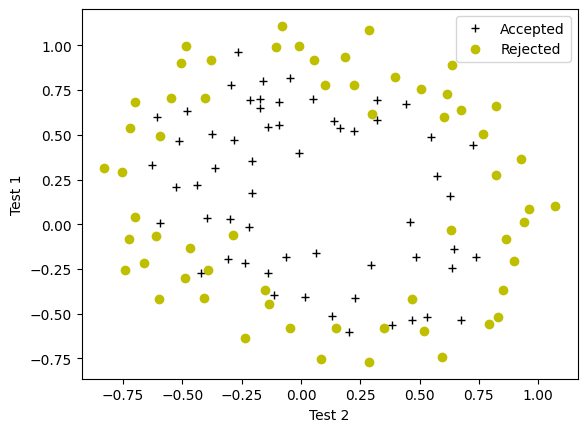

In [105]:
#test
plot_data(X_train, y_train[:], positive_label="Accepted", negative_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()

In [106]:
#feature mapping
def map_feature(X1,X2):
  X1=np.atleast_1d(X1)
  X2=np.atleast_1d(X2)
  degree=6
  out=[]
  for i in range(1,degree+1):
    for j in range(i+1):
      out.append((X1**(i-j) * (X2**j)))
  return np.stack(out, axis=1)

In [107]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [108]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [109]:
#sigmoid function
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))




In [110]:
sigmoid_test(sigmoid)


Tests passed!


In [111]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [112]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
  z = np.dot(X,w) + b
  predictions = sigmoid(z)
  class1_cost = -y*np.log(predictions)
  class2_cost = (1-y)*np.log(1-predictions)
  cost = class1_cost - class2_cost
  total_cost = cost.sum() / X.shape[0]

  return total_cost

In [113]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Tests passed!


In [114]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
  total_cost = compute_cost(X,y,w,b,lambda_=1) + lambda_ * (w**2).sum() / (2 * X.shape[0])




  return total_cost

In [115]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [116]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6618252552483951
All tests passed!


In [117]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [118]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    err = sigmoid(np.dot(X[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * X[i, j]
    dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m



  return dj_db,dj_dw

In [119]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4915254236924827
dj_dw at test_w: [-0.008601361012465367, -0.09147300847306211]
Tests passed!


In [120]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    err = sigmoid(np.dot(X[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * X[i, j]
    dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  for j in range(n):
    dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]



  return dj_db,dj_dw

In [121]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [122]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343662
Tests passed!


In [123]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01
iterations = 11000
alpha = 0.01
def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):
  w = initial_w
  b = initial_b
  J_history = []
  for i in range(iterations):
    dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, w, b, lambda_)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    J_history.append(compute_cost_reg(X_mapped, y_train, w, b, lambda_))
    if i % 100 == 0:
      print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")






  return w, b, J_history, _

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration  100: Cost     0.67   
Iteration  200: Cost     0.64   
Iteration  300: Cost     0.63   
Iteration  400: Cost     0.62   
Iteration  500: Cost     0.61   
Iteration  600: Cost     0.60   
Iteration  700: Cost     0.60   
Iteration  800: Cost     0.59   
Iteration  900: Cost     0.59   
Iteration 1000: Cost     0.59   
Iteration 1100: Cost     0.58   
Iteration 1200: Cost     0.58   
Iteration 1300: Cost     0.58   
Iteration 1400: Cost     0.57   
Iteration 1500: Cost     0.57   
Iteration 1600: Cost     0.57   
Iteration 1700: Cost     0.57   
Iteration 1800: Cost     0.56   
Iteration 1900: Cost     0.56   
Iteration 2000: Cost     0.56   
Iteration 2100: Cost     0.55   
Iteration 2200: Cost     0.55   
Iteration 2300: Cost     0.55   
Iteration 2400: Cost     0.55   
Iteration 2500: Cost     0.54   
Iteration 2600: Cost     0.54   
Iteration 2700: Cost     0.54   
Iteration 2800: Cost     0.54   
Iteration 2900: Cost     0.54   
Iteration 

In [124]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))


        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


        z = z.T


        plt.contour(u,v,z, levels = [0.5], colors="g")

<ipython-input-124-1a0f4325d43d>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


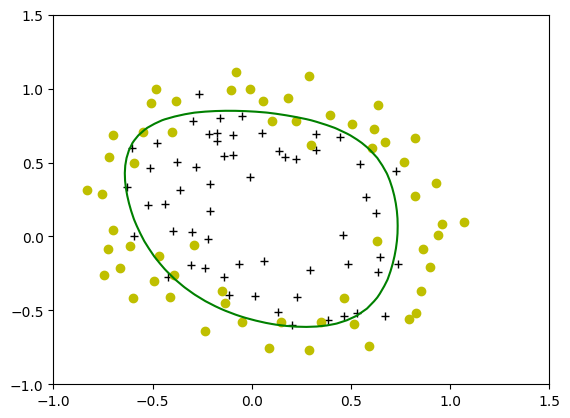

In [125]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [126]:
#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p=np.zeros(m)
  z=np.dot(X,w)+b
  for i in range(m):
    if z[i]>=0:
      p[i]=1
    else:
      p[i]=0

  return p

In [127]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 82.203390
